$\textbf{Transporte paralelo}$

Una noción intuitiva de derivada, es como una forma de cuantificar qué tan rápido está cambiando algo. Para el caso de tensores, existe una pregunta y es, "¿cambiar con respecto a qué?" Una función cualesquiera define un número en cada punto dentro del espacio-tiempo, y es resulta trivial comparar dos números diferentes. Pero un tensor es un mapa de vectores y vectores duales a los números reales, y no muy claro cómo comparar dichos mapas en diferentes puntos en el espacio-tiempo.

Existe un objeto matematico llamado derivada covariante, la cual podemos tomar para medir de alguna manera la tasa de cambio de los tensores, dado que la derivada covariante cuantifica la tasa de cambio instantánea de un campo tensorial en comparación con lo que sería el tensor si se "transportara en paralelo". Es decir, una conexión define una forma específica de mantener un tensor constante (a lo largo de algún camino), en base al cual podemos comparar los tensores cercanos.

En el espacio plano no es necesario tener mucho cuidado con el hecho de que los vectores son elementos de espacios tangentes definidos en puntos individuales; En realidad, es muy natural comparar vectores en diferentes puntos. La razón por la cual es natural es porque tiene sentido, en un espacio plano, mover un vector de un punto a otro mientras lo mantiene constante.

<img src="fig_three2.jpg">

como se muestra en la imagen anterior (tomada de https://ned.ipac.caltech.edu/level5/March01/Carroll3/Carroll3.html). Este concepto de mover un vector a lo largo de un camino, manteniéndose constante todo el tiempo, se conoce como transporte paralelo. El transporte paralelo requiere una conexión bien definida; La manipulación intuitiva de los vectores en el espacio plano hace uso implícito de la conexión Christoffel en este espacio.

La diferencia que existe entre los espacios planos y curvos es que, en un espacio curvo, el resultado del transporte paralelo de un vector de un punto a otro dependerá de la ruta tomada entre los puntos. podemos usar nuestra intuición sobre las 2-esfera para ver que este es el caso. 
<img src="fig_three3.jpg">
Por lo tanto, parece que no existe una forma natural de mover un vector de un espacio tangente a otro; siempre podemos transportarlo en paralelo, pero el resultado depende del camino, y no hay una elección natural de qué camino tomar.

A diferencia de algunos de los problemas que hemos encontrado, no hay solución para esto; simplemente debemos aprender a vivir con el hecho de que dos vectores solo se pueden comparar de forma natural si son elementos del mismo espacio tangente. Por ejemplo, dos partículas que se cruzan tienen una velocidad relativa bien definida, que no puede ser mayor que la velocidad de la luz. Pero dos partículas en diferentes puntos en una variedad curva no tienen una noción bien definida de velocidad relativa; el concepto simplemente no tiene sentido. 

''Por supuesto, en ciertas situaciones especiales sigue siendo útil hablar como si tuviera sentido, pero la utilidad ocasional no sustituye la definición rigurosa. En cosmología, por ejemplo, la luz de galaxias distantes se desplaza hacia el rojo con respecto a las frecuencias que observaríamos desde una fuente estacionaria cercana. Dado que este fenómeno se parece mucho al efecto Doppler convencional debido al movimiento relativo, estamos muy tentados a decir que las galaxias están "alejándose de nosotros" a una velocidad definida por su desplazamiento al rojo. 

A un nivel riguroso, esto no tiene sentido, lo que Wittgenstein llamaría un "error gramatical", las galaxias no están retrocediendo, ya que la noción de su velocidad con respecto a nosotros no está bien definida. Lo que realmente está sucediendo es que la métrica del espacio-tiempo entre nosotros y las galaxias ha cambiado (el universo se ha expandido) a lo largo del camino del fotón de aquí para allá, lo que lleva a un aumento en la longitud de onda de la luz. Como ejemplo de cómo puedes equivocarte, la ingenua aplicación de la fórmula Doppler al desplazamiento al rojo de las galaxias implica que algunas de ellas retroceden más rápido que la luz, en aparente contradicción con la relatividad. La resolución de esta aparente paradoja es simplemente que la noción misma de su retroceso no debe tomarse literalmente,
Suficiente sobre lo que no podemos hacer; Veamos lo que podemos''. 


Se supone que el transporte paralelo es la generalización del espacio curvo del concepto de "mantener constante el vector" a medida que lo movemos a lo largo de un camino; de manera similar para un tensor de rango arbitrario. Dado una curva $x(\lambda)$ el requerimiento de que un tensor $T_{\nu_1, \nu_2, ..., \nu_l}^{~~~~~~~~~~~~~~~\mu_1, \mu_2, ..., \mu_k}$ sea constante a lo largo de la curva es

$$\frac{D}{d  \lambda}T_{\nu_1, \nu_2, ..., \nu_l}^{~~~~~~~~~~~~~~~\mu_1, \mu_2, ..., \mu_k} = 0$$
$$\frac{D}{d  \lambda} = \frac{dx^{\mu}}{d \lambda} \nabla_{\mu}$$

In [1]:
import numpy as np
from numpy import arange
from IPython.display import Latex, display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import matplotlib.pyplot as plt
from IPython import display

from sympy import Subs, Function, sin, cos, diff, Matrix, symbols, simplify, sqrt, pi

Para un analisis computacional de la ecuación anterior, podemos definir un tensor $V^{\mu}$(vector) en el espacio plano, luego su transporte paralelo esta dado por

$$\frac{D}{d  \lambda}V^{\mu} = \frac{dx^{\sigma}}{d \lambda} \nabla_{\sigma}V^{\mu} = \frac{dx^{\sigma}}{d \lambda} \partial_{\sigma}V^{\mu} + \Gamma_{\sigma\rho}^{\mu} \frac{dx^{\sigma}}{d \lambda}V^{\rho}= 0$$

$$ \frac{d}{d \lambda}V^{\mu} + \Gamma_{\sigma\rho}^{\mu} \frac{dx^{\sigma}}{d \lambda}V^{\rho}= 0$$

Dado que el transporte paralelo hace uso de una conexión bien definida, se hace uso explicito de la conexión levi-civita.

$$ \Gamma_{\mu \nu}^{\rho} = \frac{1}{2}g^{\rho \sigma}\left(\partial_{\mu}g_{\nu\sigma} + \partial_{\nu}g_{\mu\sigma} - \partial_{\sigma}g_{\mu\nu}\right)$$

si $V = (0, 0, 0, e_z)$, un vector que apunta en la dirección z,  sabemos que $g_{\mu\nu}$ cambia a $\eta_{\mu\nu}$, podemos tomar la idea de que la métrica no evoluciona en el tiempo, por lo tanto los valores correspondientes a la conexión es

In [2]:
print('--------métrica euclidiana----------')
D = 3 # solo dimensión espacial
eta = Matrix([['1' , '0' , '0'],['0', '1', '0'],['0', '0', '1']]) # definición de la métrica con sympy
print(eta)
print('-------------------------')

etainv = eta.inv() # se halla la inversa de la metrica
gamma = np.zeros((D,D,D),list) # varible para los símbolos de christoffel asociados a la métrica
q = ['r','theta','phi']
aux = 0
suma = 0
for i in range(D): #lambda
    for j in range(D): # mu
        for k in range(D): # nu
            for l in range(D): # sigma
                suma += 0.5*etainv[i,l]*(diff(eta[k,l],q[j]) 
                                            + diff(eta[j,l],q[k]) - diff(eta[j,k],q[l]))
            gamma[i][j][k] = suma # para cada indice guarda la suma sobre sigma
            if gamma[i,j,k] != 0: 
                print("gamma(",q[i], q[j], q[k],") = ",gamma[i,j,k])
            else:
                aux += 1
            sum = 0
if aux == (D)**3: # si los coefiientes son todos cero 
    print(" los valores de los coeficientes son cero")

--------métrica euclidiana----------
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
-------------------------
 los valores de los coeficientes son cero


Dado que los valores de la conexión son todos cero, la constancia del transporte esta reflejado en el primer término,

$$\frac{d}{d \lambda} V^{\mu} = 0$$

Esto implica que el vector se mantiene constante a lo largo de la curva $x(\lambda)$ bajo el transporte paralelo en el espacio plano. si dicha curva está parametrizada como un circulo unitario

$$ z = cos(\lambda), ~ y = sin(\lambda)$$
$$ x = cos(\lambda), ~ y = sin(\lambda)$$
$$ x = cos(\lambda), ~ z = sin(\lambda)$$
Estas tres parametrizaciones siguen que el vector es paralo, puesto que el vector permanece conste bajo cualquier parametrización.

Para visualizar su comportamiento tomemos una paremetrización, la segunda se encuentra en el plano xy. tomando la ecuación general o implícita del plano $ax+by+cz+d=0$, la cual tiene como normal $\vec{n} = (a,b,c)$ la cual pasa por el punto $P_o = (X_o, Y_o, Z_0)$, tenemos que para un plano situado en el eje xy, tiene como normal $\vec{n} = (0,0,1)$ la cual pasa por los puntos $P_o = (1,1,0)$, asi la ecuación toma la forma Z = 0, para todo x,y.

Text(0.5, 0, 'Z')

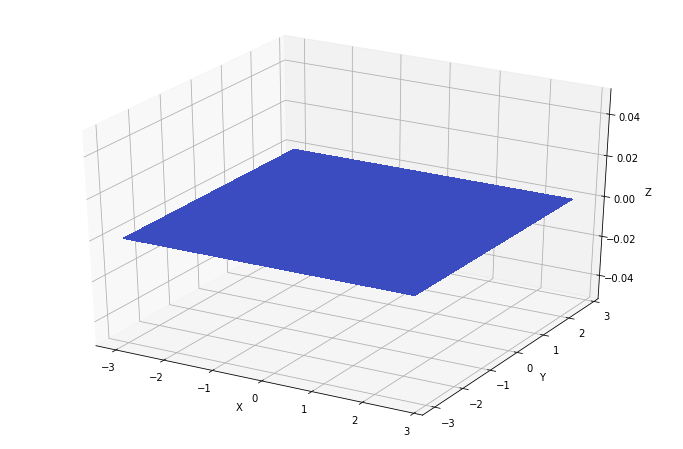

In [3]:
from pylab import gca
from matplotlib import *

X = np.arange(-3, 3, 0.25) 
Y = np.arange(-3, 3, 0.25)
Z = np.zeros((len(X),len(Y))) # Z = 0

X, Y = np.meshgrid(X, Y)

# Grafico surface en 3D
fig = plt.figure()
ax = gca(projection='3d')
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.set_size_inches(12,8) # tamaño de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Como el vector está dado por $V = (0,0,e_z)$, como hemos visto anteriormente, para cualquier valor de x,y el vector no cambia, lo cual nos dice que el vector es constante, en cualquier punto de la curva $x(\lambda)$ parametrizada anteriormente, muestra lo siguiente

Text(0.5, 0, 'Z')

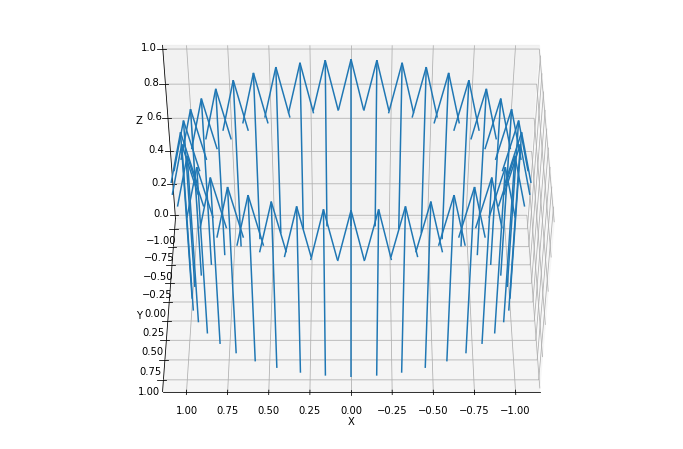

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in arange(0,2*np.pi,np.pi/20):
    Vini = np.array([cos(i),sin(i),0])
    Vfin = np.array([0,0,1])
    ax.quiver(Vini[0],Vini[1],Vini[2],Vfin[0],Vfin[1],Vfin[2],length=1, normalize=True)
    ax.view_init(elev=45, azim=90)
    ax.set_zlim(0,1)
    fig.set_size_inches(12,8) # tamaño de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

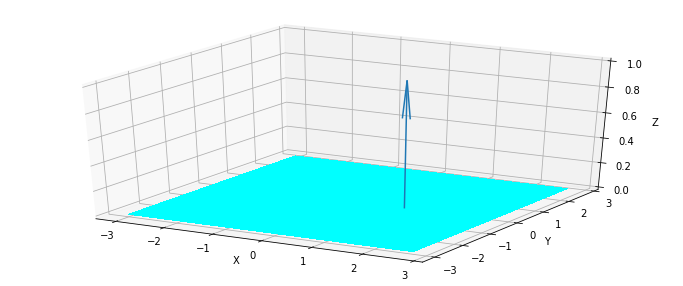

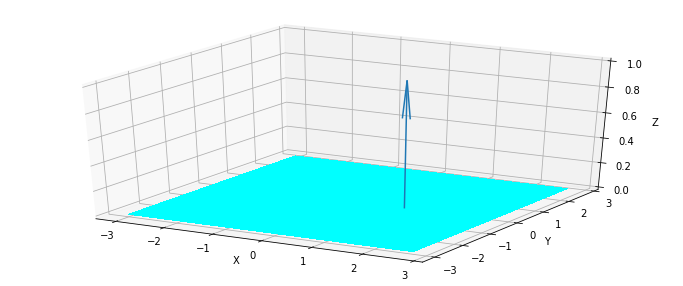

In [5]:
# animación del transporte(falta quitar el solapamiento)
fig = plt.figure()
ax = fig.gca(projection='3d')

for i in arange(0,2*np.pi,np.pi/20):
    Vini = np.array([cos(i),sin(i),0])
    Vfin = np.array([0,0,1])
    #ax.view_init(elev=45, azim=90)
    plt.gca().cla()
    fig.set_size_inches(12,5)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.cool, linewidth=0, antialiased=False)
    ax.quiver(Vini[0],Vini[1],Vini[2],Vfin[0],Vfin[1],Vfin[2],length=1, normalize=True)
    ax.set_zlim(0,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    

para cualquier vector del espacio plano, sigue la consecuencia de que su trasporte paralelo no modifica su dirección, podemos colocar un ejemplo mas para expandir el fenomeno del transporte a vectores que dependen de la posición

$$ V = (x^2+y^2)e_z $$

Este es un vector que depende de la posición, por lo tanto no es un vector constante como el ejemplo anterior, pero se mantiene constante para ciertos valores de x,y. El trasporte paralelo establece que existe un curva, en donde el vector permanece constante en esa trayectoria, luego el vector es paralelo en cada punto de la curva.

tomando la curva $x(\lambda)$, como un circulo sobre la superficie

Text(0.5, 0, 'Z')

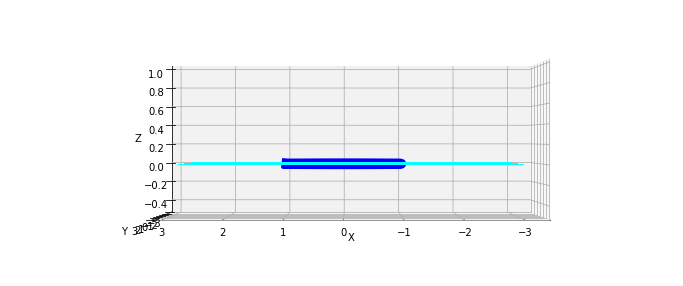

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = arange(0,np.pi*2,np.pi/20)
x = np.cos(theta)
y = np.sin(theta)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.cool, linewidth=0, antialiased=False)
ax.plot(x,y,0,'b',linewidth = 10)
ax.set_zlim(-0.5,1)
ax.view_init(elev=0, azim=90)
fig.set_size_inches(12,5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

si realizamos un cambio de base, de coordenadas cartesianas  a coordenadas esfericas para $\theta = \pi/2$, parametrizando una curva con $\phi = \lambda$ y r = R
<img src="esfericas.png">
Sabemos que el cambio de base satisface la siguiente transformación

$$x = Rsin (\theta)cos(\phi) $$
$$y = Rsin(\theta)sin(\phi)$$
$$z = Rcos(\theta)$$

Por lo tanto para $x,y,z \to r,\theta,\phi$, tenemos que la base satisface:

$$\hat{e}_i = \frac{\partial\vec{r}/\partial q_i}{\left|\partial\vec{r}/\partial q_i \right|}$$

para $\vec{r} = x\hat{i}+y\hat{j}+z\hat{k}$ y $q_i = (r,\theta,\phi)$

Ademas recordar que en coordenadas curvilineas se tiene que
$$ \frac{\partial r}{\partial q_i}\cdot \frac{\partial r}{\partial q_j} = g_{ij}$$

Entonces
$$\left|\partial\vec{r}/\partial q_i \right| = \sqrt{g_{ii}}$$
$$\hat{e}_i = \frac{1}{\sqrt{g_{ii}}} \frac{\partial \vec{r}}{\partial q_i} $$

En algunos textos aparece $h_i = \sqrt{g_{ii}}$

In [7]:
print('--------metrica inducida en una esfera----------')
# r, theta variables simbolicas
g = Matrix([['1','0','0'],['0','r**2','0'],['0','0','(r*sin(theta))**2']])
print(g)
print('-------------------------')

x = 'r*sin(theta)*cos(phi)'
y = 'r*sin(theta)*sin(phi)'
z = 'r*cos(theta)'
R = [x,y,z]
# determinación de la base
e = np.zeros((D,D),list)
string = 0
for i in range(D):
    for j in range(D):
        e[i,j] = diff(R[j],q[i])/sqrt(g[i,i])
print("base en esfericas dependietes de las cartesinas")
print("-----------------------------------------------")
qq = ['x','y','z']
for i in range(D):
    print("e(",q[i],") = ",e[i,:])
print("-----------------------------------------------")
print("cambio a las cartesianas dependiente de las esfericas")
print("-----------------------------------------------------")
e = Matrix(e)
einv = e.inv()
einv = simplify(einv)
for i in range(D):
    print("e(",qq[i],") = ",einv[i,:])

--------metrica inducida en una esfera----------
Matrix([[1, 0, 0], [0, r**2, 0], [0, 0, r**2*sin(theta)**2]])
-------------------------
base en esfericas dependietes de las cartesinas
-----------------------------------------------
e( r ) =  [sin(theta)*cos(phi) sin(phi)*sin(theta) cos(theta)]
e( theta ) =  [r*cos(phi)*cos(theta)/sqrt(r**2) r*sin(phi)*cos(theta)/sqrt(r**2)
 -r*sin(theta)/sqrt(r**2)]
e( phi ) =  [-r*sin(phi)*sin(theta)/sqrt(r**2*sin(theta)**2)
 r*sin(theta)*cos(phi)/sqrt(r**2*sin(theta)**2) 0]
-----------------------------------------------
cambio a las cartesianas dependiente de las esfericas
-----------------------------------------------------
e( x ) =  Matrix([[sin(theta)*cos(phi), sqrt(r**2)*cos(phi)*cos(theta)/r, -sqrt(r**2*sin(theta)**2)*sin(phi)/(r*sin(theta))]])
e( y ) =  Matrix([[sin(phi)*sin(theta), sqrt(r**2)*sin(phi)*cos(theta)/r, sqrt(r**2*sin(theta)**2)*cos(phi)/(r*sin(theta))]])
e( z ) =  Matrix([[cos(theta), -sqrt(r**2)*sin(theta)/r, 0]])


Nuestro vector expresado en esfericas toma la forma
$$ V(x,y,z) \to V(r,\theta,\phi)$$

In [8]:
R = Matrix([R])
V = simplify((R[0]**2+R[1]**2)*einv[2,:])
print("V = ",V)
j = 0
for i in q:
    print("V(",i,") = ",V[j])
    j += 1

V =  Matrix([[r**2*sin(theta)**2*cos(theta), -r*sqrt(r**2)*sin(theta)**3, 0]])
V( r ) =  r**2*sin(theta)**2*cos(theta)
V( theta ) =  -r*sqrt(r**2)*sin(theta)**3
V( phi ) =  0


In [9]:
r, theta, phi = symbols('r,theta,phi')
#V = Subs(V, (r), (1)).doit() # reemplazando theta por pi/2
print("V = ",V)

V =  Matrix([[r**2*sin(theta)**2*cos(theta), -r*sqrt(r**2)*sin(theta)**3, 0]])


aplicando la ecuación de transporte a lo largo de la linea $x(\lambda)$, en donde podemos elegir la parametrización de un circulo, para $\phi = \lambda$, $\theta = \pi/2$, $ R = 1$, para efectos computacionales, podemos hacer la variacion respecto a $\phi$ dado la forma de parametrización

$$ \frac{dx^{\sigma}}{d \lambda} \nabla_{\sigma}V^{\mu} = \frac{dx^{\sigma}}{d \lambda} \partial_{\sigma}V^{\mu} + \Gamma_{\sigma\rho}^{\mu} \frac{dx^{\sigma}}{d \lambda}V^{\rho}= 0$$

$$ \frac{dx^{\sigma}}{d \phi} \partial_{\sigma}V^{\mu} + \Gamma_{\sigma\rho}^{\mu} \frac{dx^{\sigma}}{d \phi}V^{\rho}= 0$$

In [10]:
ginv = g.inv()
gamma = np.zeros((D,D,D),list) # simbolos de christoffel

aux = 0 # variable suma
suma = 0
for i in range(D): #lambda
    for j in range(D): # mu
        for k in range(D): # nu
            for l in range(D): # sigma
                suma += 0.5*ginv[i,l]*(diff(g[k,l],q[j]) 
                                            + diff(g[j,l],q[k]) - diff(g[j,k],q[l]))
            gamma[i][j][k] = suma
            if gamma[i,j,k] != 0: 
                print("gamma(",q[i], q[j], q[k],") = ",gamma[i,j,k])
            else:
                aux += 1
            suma = 0
if aux == (D)**3:
    print(" los valres de los coeficientes son cero")


gamma( r theta theta ) =  -1.0*r
gamma( r phi phi ) =  -1.0*r*sin(theta)**2
gamma( theta r theta ) =  1.0/r
gamma( theta theta r ) =  1.0/r
gamma( theta phi phi ) =  -1.0*sin(theta)*cos(theta)
gamma( phi r phi ) =  1.0/r
gamma( phi theta phi ) =  1.0*cos(theta)/sin(theta)
gamma( phi phi r ) =  1.0/r
gamma( phi phi theta ) =  1.0*cos(theta)/sin(theta)


$$ \frac{dx^{\sigma}}{d \phi} \partial_{\sigma}V^{\mu} + \Gamma_{\sigma\rho}^{\mu} \frac{dx^{\sigma}}{d \phi}V^{\rho}= 0$$
En ésta ecuación existe suma sobre $\sigma, \rho$

In [11]:
sum1 = 0
sum2 = 0
for i in range(D):
    for j in range(D):
        for k in range(D):
            sum1  += gamma[i,j,k]*diff(q[j],q[2])*V[k]
        sum2 += sum1 + diff(q[j],q[2])*diff(V[i],q[j])
    print(Subs(sum2,(r),(1)).doit())
    sum1 = 0
    sum2 = 0

0
0
0


Dado que el vector es constante para la curva $x(\lambda)$ que representa un circulo, obtenemos la misma solución anterior, puesto que el vector es constante en dicha curva.

(-1.5, 1.5)

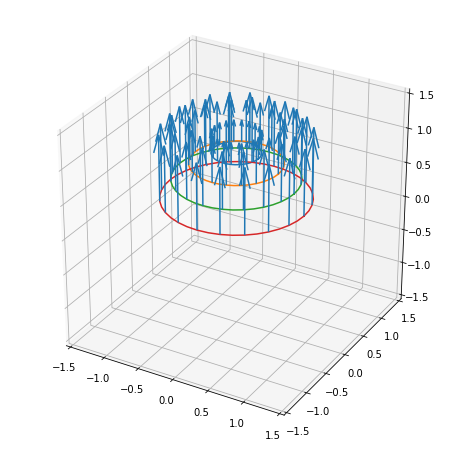

In [87]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(8,8)
for j in arange(np.pi/10,np.pi/2,np.pi/10):
    theta = j
    z_circle = np.ones(len(x_circle))*np.cos(theta)
    ax.plot(np.sin(theta)*x_circle,np.sin(theta)*y_circle,z_circle)
    for i in arange(0,np.pi*2,np.pi/10):
        x_pos = [np.sin(theta)*np.cos(i)]
        y_pos = [np.sin(theta)*np.sin(i)]
        z_pos = [np.cos(theta)]
        x_direct = [0,0,0]
        y_direct = [0,0,0]
        z_direct = [0,0,np.sin(theta)]
        ax.quiver(x_pos,y_pos,z_pos,x_direct,y_direct,z_direct, length=1)#, normalize=True)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

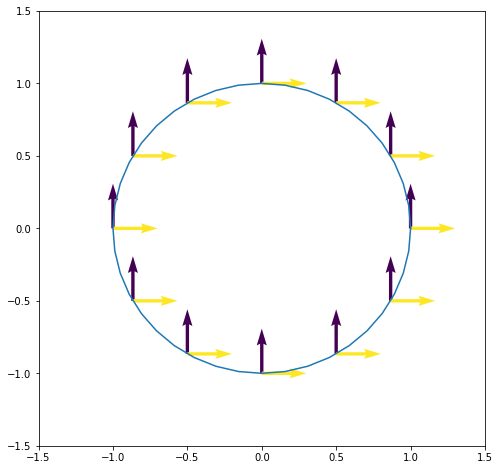

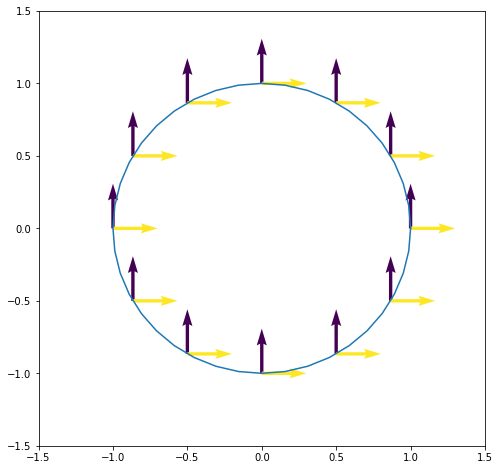

In [12]:
x_circle = np.cos(arange(0,np.pi*2+np.pi/20,np.pi/20))
y_circle = np.sin(arange(0,np.pi*2+np.pi/20,np.pi/20))
fig, ax = plt.subplots()
ax.plot(x_circle,y_circle)
fig.set_size_inches(8,8)
for i in arange(0,np.pi*2,np.pi/6):
    x_pos = [np.cos(i)]
    y_pos = [np.sin(i)]
    x_direct2 = [0,1]
    y_direct2 = [1,0]
    color = [0,1]
    #plt.gca().cla()
    ax.quiver(x_pos,y_pos,x_direct2,y_direct2, color, alpha=1, scale=10)
    ax.axis([-1.5,1.5,-1.5,1.5])
    display.clear_output(wait=True)
    display.display(plt.gcf())

Cuando hablamos de transporte paralelo, debemos tener en cuenta que un objeto transportado, solo es constante a lo largo de una curva parametrizada y por ende paralelo. En el espacio plano vemos que no existe problema en definir un objeto al cual transportemos, sea constante o no. Pero en el espacio curvo existe un fenomeno que debemos tener en cuenta, cuando tomamos un objeto que depende de la posición, no existe una forma de comparar dicho objeto trasportado de un punto a otro, pero es posible realizar una operación en dcho punto del espcio. La ecuación de transporte paralelo cotiene un término de proyección, que se asemeja a una especie de velocidad, la proyección surge de una transformación, la cual da lugar a una restricción del lugar donde definimos un objeto, recordemos que la dimensión de un espacio esta formada por representaciones irreducibles linealmente independientes, la cual pueden pensarse como objetos que pertenecen al espacio tangente de una variedad, estos objetos estan restringidos a vivir en esa superficie.

Tomando como referencia una esfera, en donde existen habitantes que estan restringidos a vivir sobre la superficie, sabemos que no existe un vector que cumpla que sea constante, pero existe un campo de vectores que cumple que sea constante, mas no paralelo. En dos dimensiones tenemos que la base se comporta como

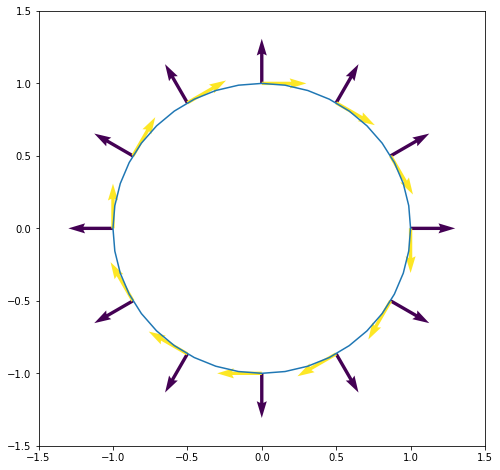

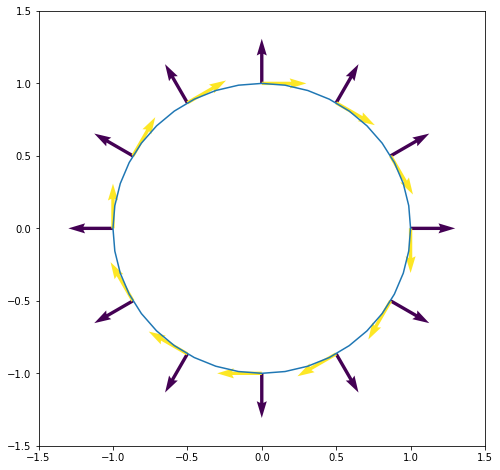

In [13]:
fig, ax = plt.subplots()
ax.plot(x_circle,y_circle)
fig.set_size_inches(8,8)
for i in arange(0,np.pi*2,np.pi/6):
    x_pos = [np.cos(i)]
    y_pos = [np.sin(i)]
    x_direct = [np.cos(i),np.cos(i-np.pi/2)]
    y_direct = [np.sin(i),np.sin(i-np.pi/2)]
    color = [0,1]
    #plt.gca().cla()
    ax.quiver(x_pos,y_pos,x_direct,y_direct, color, alpha=1, scale=10)
    ax.axis([-1.5,1.5,-1.5,1.5])
    display.clear_output(wait=True)
    display.display(plt.gcf())

En tres dimensiones, encontramos la esfera, la variedad $s^2$ para un radio fijo, tambien llamada la superficie de riemman de genero cero

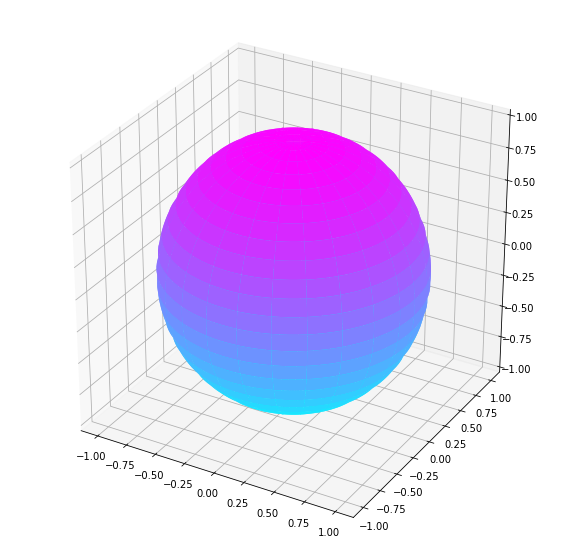

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10,10)
def sphere(r):

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v))
    y = r * np.outer(np.sin(u), np.sin(v))
    z = r * np.outer(np.ones(np.size(u)), np.cos(v))
    return x,y,z

x,y,z = sphere(1)
ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.cool) #color='r',

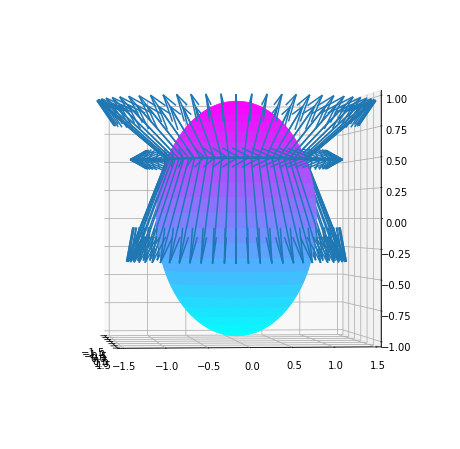

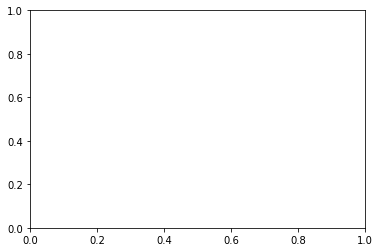

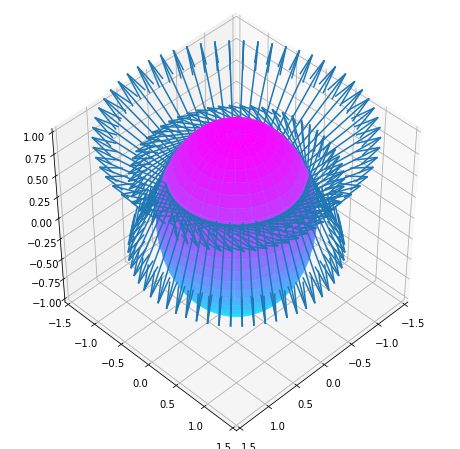

In [15]:
fig, ax = plt.subplots()
x,y,z = sphere(1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.cool) #color='r',
fig.set_size_inches(8,8)
theta = np.pi/3
for i in arange(0,np.pi*2,np.pi/30):
    x_pos = [np.sin(theta)*np.cos(i)]
    y_pos = [np.sin(theta)*np.sin(i)]
    z_pos = [np.cos(theta)]
    x_direct = [np.sin(theta)*np.cos(i),np.cos(theta)*np.cos(i),-np.sin(i)]
    y_direct = [np.sin(theta)*np.sin(i),np.cos(theta)*np.sin(i),np.cos(i)]
    z_direct = [np.cos(theta),-np.sin(theta),0]
    ax.quiver(x_pos,y_pos,z_pos,x_direct,y_direct,z_direct, length=1)#, normalize=True)
    ax.axis([-1.5,1.5,-1.5,1.5])
    ax.view_init(elev=0, azim = i*180/np.pi)
    display.clear_output(wait=True)
    display.display(plt.gcf())
ax.view_init(elev = 45, azim=45)
fig.set_size_inches(8,8)

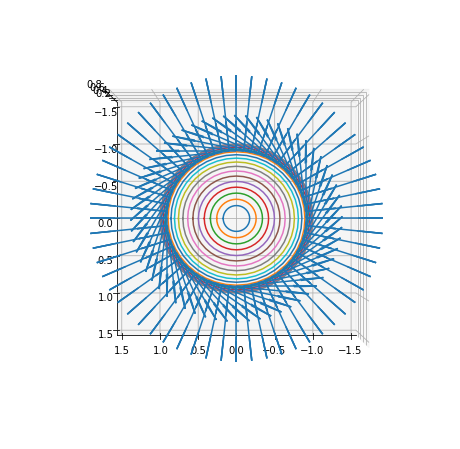

(-1.5, 1.5)

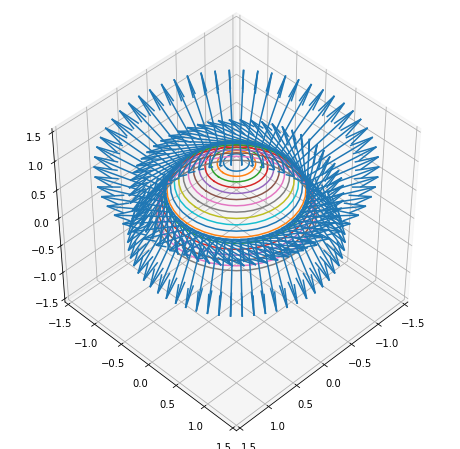

In [16]:
#x,y,z = sphere(1)
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot(x_circle,y_circle)
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.cool) #color='r',
fig.set_size_inches(8,8)
for j in arange(np.pi/20,np.pi/2,np.pi/40):
    theta = j
    z_circle = np.ones(len(x_circle))*np.cos(theta)
    ax.plot(np.sin(theta)*x_circle,np.sin(theta)*y_circle,z_circle)
fig.set_size_inches(8,8)
theta = np.pi/3
for i in arange(0,np.pi*2,np.pi/30):
    x_pos = [np.sin(theta)*np.cos(i)]
    y_pos = [np.sin(theta)*np.sin(i)]
    z_pos = [np.cos(theta)]
    x_direct = [np.sin(theta)*np.cos(i),np.cos(theta)*np.cos(i),-np.sin(i)]
    y_direct = [np.sin(theta)*np.sin(i),np.cos(theta)*np.sin(i),np.cos(i)]
    z_direct = [np.cos(theta),-np.sin(theta),0]
    ax.quiver(x_pos,y_pos,z_pos,x_direct,y_direct,z_direct, length=1)#, normalize=True)
    ax.axis([-1.5,1.5,-1.5,1.5])
    ax.view_init(elev=90, azim = 90)
    display.clear_output(wait=True)
    display.display(plt.gcf())
ax.view_init(elev=45, azim = 45)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

Ahora, si un campo de tensores satisfacen que sean constante a lo largo de una curva $x(\lambda)$, entonces se dice que el tensor es trasnportado paralelo

In [17]:
print('--------métrica----------')
D = 2 # solo dimensiones espacial variedad s2
g = Matrix([['r**2' , '0'],['0', '(r*sin(theta))**2']]) # definición de la métrica con sympy
print(g)
print('-------------------------')

ginv = g.inv() # se halla la inversa de la metrica
gamma = np.zeros((D,D,D),list) # varible para los símbolos de christoffel asociados a la métrica
q = ['theta','phi']
aux = 0
suma = 0
for i in range(D): #lambda
    for j in range(D): # mu
        for k in range(D): # nu
            for l in range(D): # sigma
                suma += 0.5*ginv[i,l]*(diff(g[k,l],q[j]) + diff(g[j,l],q[k]) - diff(g[j,k],q[l]))
            gamma[i][j][k] = suma # para cada indice guarda la suma sobre sigma
            if gamma[i,j,k] != 0: 
                print("gamma(",q[i], q[j], q[k],") = ",gamma[i,j,k])
            else:
                aux += 1
            suma = 0
if aux == (D)**3: # si los coefiientes son todos cero 
    print(" los valores de los coeficientes son cero")
else:
    print("Estos son los simbolos de christoffel diferentes de cero")
    print("-------------------------------------------------------")

--------métrica----------
Matrix([[r**2, 0], [0, r**2*sin(theta)**2]])
-------------------------
gamma( theta phi phi ) =  -1.0*sin(theta)*cos(theta)
gamma( phi theta phi ) =  1.0*cos(theta)/sin(theta)
gamma( phi phi theta ) =  1.0*cos(theta)/sin(theta)
Estos son los simbolos de christoffel diferentes de cero
-------------------------------------------------------


Retomando la ecuación de transporte paralelo para un vector $V = V^{\theta}e_{\theta} + V^{\phi}e_{\phi}$, la cual sigue  una curva parametrizada de la forma $\phi = \lambda$, por lo que $d\lambda = d\phi$


$$ \frac{dx^{\sigma}}{d \phi} \partial_{\sigma}V^{\mu} + \Gamma_{\sigma\rho}^{\mu} \frac{dx^{\sigma}}{d \phi}V^{\rho}= 0$$

En ésta ecuación existe suma sobre $\sigma, \rho$

Las ecuaciones en este caso son

$$ \frac{d\theta}{d\phi} \frac{\partial V^{\theta}}{\partial\theta} + \frac{d\phi}{d\phi} \frac{\partial V^{\theta}}{\partial\phi} + \Gamma^{\theta}_{\phi\phi}\frac{d\phi}{d\phi}V^{\phi} = 0$$

$$ \frac{d\theta}{d\phi} \frac{\partial V^{\phi}}{\partial\theta} + \frac{d\phi}{d\phi} \frac{\partial V^{\phi}}{\partial \phi} + \Gamma^{\phi}_{\phi\theta}\frac{d\phi}{d\phi}V^{\theta} = 0$$

Para la trayectoria en el que $\theta = \pi/3$, tenemos que las ecuaciones se simplifican aun mas

$$\frac{\partial V^{\theta}}{\partial \phi} + \Gamma^{\theta}_{\phi\phi}V^{\phi} = 0$$

$$\frac{\partial V^{\phi}}{\partial \phi} + \Gamma^{\phi}_{\phi\theta}V^{\theta} = 0$$

Reemplazando los términos de la conexión, se tiene

$$\partial_{\phi} V^{\theta} -sin(\theta)cos(\theta)V^{\phi} = 0$$

$$\partial_{\phi} V^{\phi} + \frac{cos(\theta)}{sin(\theta)}V^{\theta} = 0$$

Esta ecuación, tiene derivada de primer orden acoplada, pero es posible desacoplar, aunque esto incrementa el orden de la derivada, podemos utilizar metodos numericos para comparar con la solución analitica. Los valores de contorno (condicion inicial) esta dada por

$$ V(\phi = 0) = -1e_{\theta} +0e_{\phi}$$

podemos desacoplar las ecuaciones derivando respecto de $\phi$, la cual da como resultado

$$\partial^2_{\phi}V^{\theta} + cos^2(\theta)V^{\theta} = 0$$
$$\partial^2_{\phi}V^{\phi} + cos^2(\theta)V^{\phi} = 0$$

la solución analítica de esta ecuación es de la forma

$$ V^{\theta} = -cos(cos(\theta)\phi)$$
$$ V^{\phi} = \frac{1}{sin(\theta)}sin(cos(\theta)\phi)$$

por lo tanto 

$$ V = -cos(cos(\theta)\phi)e_{\theta} + \frac{1}{sin(\theta)}sin(cos(\theta)\phi)e_{\phi}$$


El comportamiento de la base sigue la siguente estructura

(-1.5, 1.5)

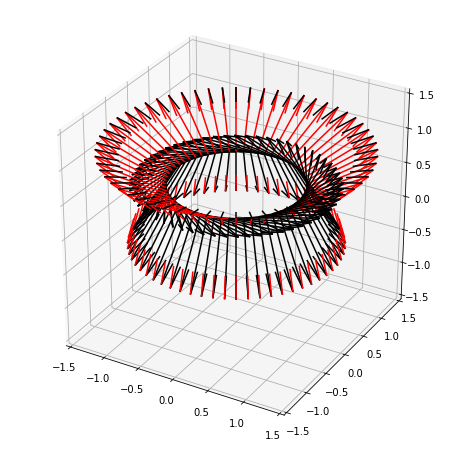

In [18]:
#x,y,z = sphere(1)
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(x, y, z, rstride=4, cstride=4, cmap=cm.cool) #color='r',
fig.set_size_inches(8,8)
theta = np.pi/3
for i in arange(0,np.pi*2,np.pi/30):
    x_pos = [np.sin(theta)*np.cos(i)]
    y_pos = [np.sin(theta)*np.sin(i)]
    z_pos = [np.cos(theta)]
    x_direct = [np.sin(theta)*np.cos(i),np.cos(theta)*np.cos(i),-np.sin(i)]
    y_direct = [np.sin(theta)*np.sin(i),np.cos(theta)*np.sin(i),np.cos(i)]
    z_direct = [np.cos(theta),-np.sin(theta),0]
    ax.quiver(x_pos,y_pos,z_pos,x_direct,y_direct,z_direct, length=1, 
              color = [[1,0,0],[0,0,0],[0,0,0]])#, normalize=True)
#ax.set_axis([-1.5,1.5,-1.5,1.5,-1.5,1.5])
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)
    #ax.view_init(elev=0, azim = i*180/np.pi)
    #display.clear_output(wait=True)
    #display.display(plt.gcf())

$$ V = -cos(cos(\theta)\phi)e_{\theta} + \frac{1}{sin(\theta)}sin(cos(\theta)\phi)e_{\phi}$$

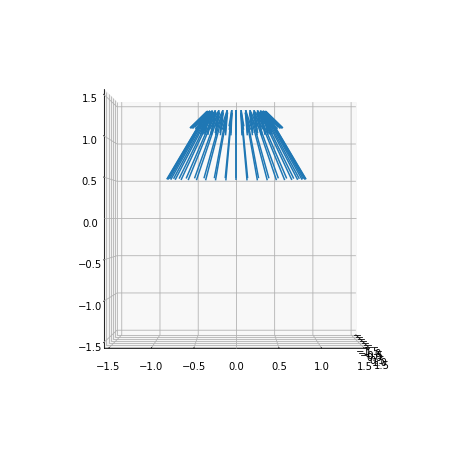

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(8,8)
theta = np.pi/3
for i in arange(0,np.pi*2,np.pi/20):
    x_pos = [np.sin(theta)*np.cos(i)]
    y_pos = [np.sin(theta)*np.sin(i)]
    z_pos = [np.cos(theta)]
    
    x_direct = [np.sin(theta)*np.cos(i),np.cos(theta)*np.cos(i),-np.sin(i)]
    y_direct = [np.sin(theta)*np.sin(i),np.cos(theta)*np.sin(i),np.cos(i)]
    z_direct = [np.cos(theta),-np.sin(theta),0]
    ax.quiver(x_pos,y_pos,z_pos,-x_direct[1],-y_direct[1],-z_direct[1], length=1)#, normalize=True)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)
ax.view_init(elev=0, azim = 0)
    #display.clear_output(wait=True)
    #display.display(plt.gcf())

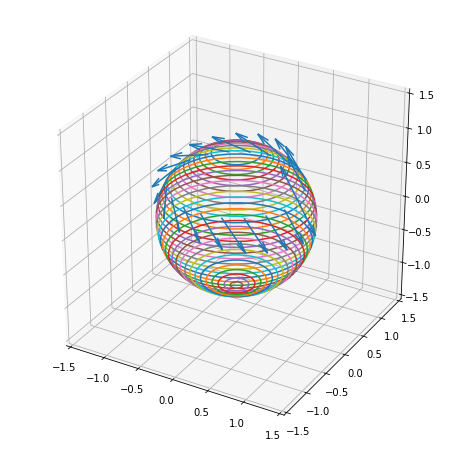

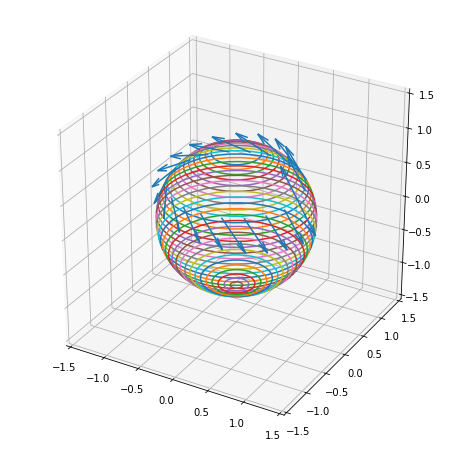

In [88]:
fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(8,8)
for j in arange(np.pi/10,np.pi,np.pi/40):
    theta = j
    z_circle = np.ones(len(x_circle))*np.cos(theta)
    ax.plot(np.sin(theta)*x_circle,np.sin(theta)*y_circle,z_circle)
fig.set_size_inches(8,8)
theta = 60*np.pi/180
for i in arange(0,np.pi*2+np.pi/10,np.pi/10):
    x_pos = [np.sin(theta)*np.cos(i)]
    y_pos = [np.sin(theta)*np.sin(i)]
    z_pos = [np.cos(theta)]
    #$$ V = -cos(cos(\theta)\phi)e_{\theta} + \frac{1}{sin(\theta)}sin(cos(\theta)\phi)e_{\phi}$$
    x_direct = [-np.cos(np.cos(theta)*i)*np.cos(theta)*np.cos(i)-(1/np.sin(theta))*sin(np.cos(theta)*i)*np.sin(i)]
    y_direct = [-np.cos(np.cos(theta)*i)*np.cos(theta)*np.sin(i)+(1/np.sin(theta))*np.sin(np.cos(theta)*i)*np.cos(i)]
    z_direct = [np.cos(np.cos(theta)*i)*np.sin(theta)]
    ax.quiver(x_pos,y_pos,z_pos,x_direct,y_direct,z_direct, length=0.5)#, normalize=True)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(-1.5,1.5)
    #ax.view_init(elev=45, azim = 45)
    display.clear_output(wait=True)
    display.display(plt.gcf())